In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [11]:
### 加载数据
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)

# 二元化标记
y = label_binarize(y, classes=[0, 1, 2])
# print(y[:5])

n_classes = y.shape[1]
#### 添加噪音
np.random.seed(0)
n_samples, n_features = X.shape
random_state = np.random.RandomState(0)
X = np.c_[X, np.random.randn(n_samples, 200 * n_features)]
print("增加噪音后的形状:", X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.5, 
                                                    random_state=0)
### 训练模型
clfModel = SVC(kernel='linear', probability=True, random_state=random_state)
clf = OneVsRestClassifier(clfModel)
clf.fit(X_train, y_train)
y_score = clf.fit(X_train, y_train).decision_function(X_test)
# print(y_score[:5])

(150, 4)
增加噪音后的形状: (150, 804)


In [3]:
### 获取 ROC

fpr = dict()
tpr = dict()
roc_auc = dict()

from sklearn.metrics import auc, roc_curve
# print(y_test[:, 0])
# print(np.sort(y_score[:, 0]))

In [4]:
fpr0, tpr0, thresholds0 = roc_curve(y_test[:, 0], y_score[:, 0])
print(thresholds0)
print("fpr:", fpr0)
print("tpr:", tpr0)

[ 2.02104714  1.00481639 -4.52609987]
fpr: [0. 0. 1.]
tpr: [0.04761905 1.         1.        ]



 0
fpr: [0.         0.         0.01851852 0.01851852 0.03703704 0.03703704
 0.05555556 0.05555556 0.07407407 0.07407407 0.09259259 0.09259259
 0.12962963 0.12962963 0.14814815 0.14814815 0.2037037  0.2037037
 0.27777778 0.27777778 1.        ]
tpr: [0.04761905 0.14285714 0.14285714 0.19047619 0.19047619 0.28571429
 0.28571429 0.38095238 0.38095238 0.61904762 0.61904762 0.66666667
 0.66666667 0.76190476 0.76190476 0.9047619  0.9047619  0.95238095
 0.95238095 1.         1.        ]

 1
fpr: [0.         0.         0.02222222 0.02222222 0.11111111 0.11111111
 0.17777778 0.17777778 0.2        0.2        0.24444444 0.24444444
 0.26666667 0.26666667 0.37777778 0.37777778 0.42222222 0.42222222
 0.48888889 0.48888889 0.57777778 0.57777778 0.62222222 0.62222222
 0.64444444 0.64444444 0.66666667 0.66666667 0.73333333 0.73333333
 0.75555556 0.75555556 0.88888889 0.88888889 1.        ]
tpr: [0.03333333 0.13333333 0.13333333 0.16666667 0.16666667 0.2
 0.2        0.26666667 0.26666667 0.33333333 0.33

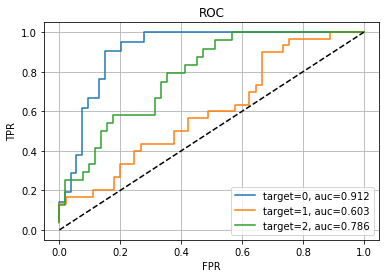

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(n_classes):
    print('\n', i)
#     print(np.sort(y_score[:, i]))
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#     print(_)
    print("fpr:", fpr[i])
    print("tpr:", tpr[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax.plot(fpr[i], tpr[i], label="target=%d, auc=%.3f" % (i, roc_auc[i]))
#     break
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title("ROC")
ax.legend(loc="best")
# ax.set_xlim(0, 1.1)
# ax.set_ylim(0, 1.1)
ax.grid()
plt.show()